# Travel Planner Based on Currency Conversion Risk

**Project Goal:** Create a travel planning tool that will allow the user to select a set of countries they would like to travel to and a travel timeframe (3,6,12 months). The tool will analyze historical Forex data and predict the country that will have the most favorable currency within the given travel timeframe.

**The tool will:** Check Forex volatility as barometer for travel decisions Use historical forex data (up to 2 years) 3 - 6 - 12 months predictive outlook using Monte Carlo and other algorithms Produce graphs, risk graphs, value graphs, Variables - currency / country, traveling times (3-6-12 months)


### Import Library

In [1]:
import os
import requests
import pandas as pd
import pandas_datareader as pdr

from pandas_datareader import data as wb
import seaborn as sns

from dotenv import load_dotenv
import numpy as np
%matplotlib inline
import json
from forex_python.converter import CurrencyRates
import datetime as dt
from countryinfo import CountryInfo

import plotly.express as px
from pathlib import Path
#Interactive Plot 
import plotly.offline as pyo
#Candlestick Chart
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'

from MCForecastTools import MCSimulation

import pandas_montecarlo

In [2]:
# Load .env enviroment variables
load_dotenv()

# Set Alpha Vantage API key 
alpha_vantage_api_key = os.getenv("ALPHA_VANTAGE_API")

# Verify that Alpha Vantage key was correctly loaded
print(f"Alpha Vantage Key type: {type(alpha_vantage_api_key)}")



Alpha Vantage Key type: <class 'str'>


### Country 1

In [3]:
name = (input("What Country are you interested in traveling to? "))
country_name = CountryInfo(name).name()
country_border= CountryInfo(name).borders()
country_capital= CountryInfo(name).capital()
country_currency = CountryInfo(name).currencies()
country_timezone = CountryInfo(name).timezones()
country_wiki = CountryInfo(name).wiki()
country_info = print(f"Country name: {country_name}", '\n'
                      f"Country Capital: {country_capital}", '\n'
                      f"Country Border: {country_border}", '\n' 
                      f"Country Currency: {country_currency}", '\n' 
                      f"Country Timezone: {country_timezone}", '\n'
                      f"Country Wiki: {country_wiki}")

country_info




What Country are you interested in traveling to?  italy


Country name: italy 
Country Capital: Rome 
Country Border: ['AUT', 'FRA', 'SMR', 'SVN', 'CHE', 'VAT'] 
Country Currency: ['EUR'] 
Country Timezone: ['UTC+01:00'] 
Country Wiki: http://en.wikipedia.org/wiki/italy


### Country 2

In [4]:
name_2 = (input("What Country are you interested in traveling to? "))
country_name_2 = CountryInfo(name_2).name()
country_border_2= CountryInfo(name_2).borders()
country_capital_2= CountryInfo(name_2).capital()
country_currency_2 = CountryInfo(name_2).currencies()
country_timezone_2 = CountryInfo(name_2).timezones()
country_wiki_2 = CountryInfo(name_2).wiki()
country_info_2 = print(f"Country name: {country_name_2}", '\n'
                      f"Country Capital: {country_capital_2}", '\n'
                      f"Country Border: {country_border_2}", '\n' 
                      f"Country Currency: {country_currency_2}", '\n' 
                      f"Country Timezone: {country_timezone_2}", '\n'
                      f"Country Wiki: {country_wiki_2}")

country_info_2

What Country are you interested in traveling to?  france


Country name: france 
Country Capital: Paris 
Country Border: ['AND', 'BEL', 'DEU', 'ITA', 'LUX', 'MCO', 'ESP', 'CHE'] 
Country Currency: ['EUR'] 
Country Timezone: ['UTC−10:00', 'UTC−09:30', 'UTC−09:00', 'UTC−08:00', 'UTC−04:00', 'UTC−03:00', 'UTC+01:00', 'UTC+03:00', 'UTC+04:00', 'UTC+05:00', 'UTC+11:00', 'UTC+12:00'] 
Country Wiki: http://en.wikipedia.org/wiki/france


### Country 3

In [5]:
name_3 = (input("What Country are you interested in traveling to? "))
country_name_3 = CountryInfo(name_3).name()
country_border_3= CountryInfo(name_3).borders()
country_capital_3= CountryInfo(name_3).capital()
country_currency_3 = CountryInfo(name_3).currencies()
country_timezone_3 = CountryInfo(name_3).timezones()
country_wiki_3 = CountryInfo(name_3).wiki()
country_info_3 = print(f"Country name: {country_name_3}", '\n'
                      f"Country Capital: {country_capital_3}", '\n'
                      f"Country Border: {country_border_3}", '\n' 
                      f"Country Currency: {country_currency_3}", '\n' 
                      f"Country Timezone: {country_timezone_3}", '\n'
                      f"Country Wiki: {country_wiki_3}")

country_info_3

What Country are you interested in traveling to?  china


Country name: china 
Country Capital: Beijing 
Country Border: ['AFG', 'BTN', 'MMR', 'HKG', 'IND', 'KAZ', 'PRK', 'KGZ', 'LAO', 'MAC', 'MNG', 'PAK', 'RUS', 'TJK', 'VNM'] 
Country Currency: ['CNY'] 
Country Timezone: ['UTC+08:00'] 
Country Wiki: http://en.wikipedia.org/wiki/china


In [6]:
#country Currency 1
pair = country_currency[0].strip("''")
forex_pair = pair + "USD"

#Country Currency 2
pair_2 = country_currency_2[0].strip("''")
forex_pair_2 = pair_2 + "USD"

#Country Currency 3
pair_3 = country_currency_3[0].strip("''")
forex_pair_3 = pair_3 + "USD"


In [7]:
# forex_pair = input("Enter the forex pair: ")

# Currency 1
time_series = pdr.av.time_series.AVTimeSeriesReader(forex_pair, api_key='alpha_vantage_api_key')
forex = time_series.read()
forex.index = pd.to_datetime(forex.index, format='%Y-%m-%d')
Forex = forex



In [8]:
# Currency 2
time_series_2 = pdr.av.time_series.AVTimeSeriesReader(forex_pair_2, api_key='alpha_vantage_api_key')
forex_2 = time_series_2.read()
forex_2.index = pd.to_datetime(forex_2.index, format='%Y-%m-%d')
Forex_2 = forex_2
forex_2

open    high     low   close  volume
2003-02-24  1.0731  1.0805  1.0705  1.0790       0
2003-02-25  1.0790  1.0821  1.0740  1.0765       0
2003-02-26  1.0764  1.0811  1.0726  1.0789       0
2003-02-27  1.0788  1.0837  1.0733  1.0767       0
2003-02-28  1.0765  1.0807  1.0729  1.0801       0
...            ...     ...     ...     ...     ...
2022-04-18  1.0807  1.0822  1.0768  1.0778       0
2022-04-19  1.0776  1.0815  1.0760  1.0788       0
2022-04-20  1.0789  1.0867  1.0782  1.0851       0
2022-04-21  1.0850  1.0936  1.0822  1.0835       0
2022-04-22  1.0835  1.0852  1.0769  1.0794       0

[5000 rows x 5 columns]

In [9]:
# Currency 3
time_series_3 = pdr.av.time_series.AVTimeSeriesReader(forex_pair_3, api_key='alpha_vantage_api_key')
forex_3 = time_series_3.read()
forex_3.index = pd.to_datetime(forex_3.index, format='%Y-%m-%d')
Forex_3 = forex_3
forex_3

open    high     low   close  volume
2014-11-24  0.1632  0.1632  0.1627  0.1628       0
2014-11-25  0.1628  0.1629  0.1624  0.1629       0
2014-11-26  0.1629  0.1630  0.1626  0.1628       0
2014-11-27  0.1628  0.1631  0.1626  0.1628       0
2014-11-28  0.1630  0.1630  0.1624  0.1627       0
...            ...     ...     ...     ...     ...
2022-04-18  0.1569  0.1572  0.1568  0.1568       0
2022-04-19  0.1571  0.1571  0.1563  0.1564       0
2022-04-20  0.1564  0.1564  0.1557  0.1557       0
2022-04-21  0.1557  0.1560  0.1550  0.1550       0
2022-04-22  0.1550  0.1550  0.1537  0.1538       0

[1934 rows x 5 columns]

In [10]:
forex_close = Forex.drop(columns=['volume', 'open', 'high', 'low'])

In [11]:
forex_2_close = Forex_2.drop(columns=['volume', 'open', 'high', 'low'])

In [12]:
forex_3_close = Forex_3.drop(columns=['volume', 'open', 'high', 'low'])

In [14]:
joined_forex = pd.concat([forex_close, forex_2_close, forex_3_close], axis="columns", join="inner", keys=[f'{forex_pair}',f'{forex_pair_2}',f'{forex_pair_3}'])
joined_forex

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [ ]:
# Re name

joined_forex_renamed = joined_forex.rename(columns={"close": f"{forex_pair}", "close": f"{forex_pair_2}", "close": f"{forex_pair_3}"})


In [15]:
# plotting the opening and closing value 
forex[['close']].plot()



In [16]:
# plotting the opening and closing value of country currency 2
forex_2[['close']].plot()


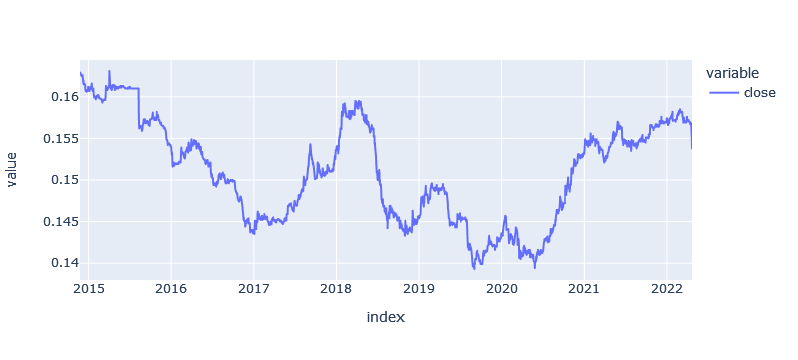

In [17]:
# plotting the opening and closing value of country currency 3
forex_3[['close']].plot()


In [18]:
# plotting the closing value of all 3 country currencies 
joined_forex[['close']].plot()

NameError: name 'joined_forex' is not defined

In [19]:
forex.describe()


open         high          low        close  volume
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.0
mean      1.249035     1.254410     1.243603     1.249023     0.0
std       0.120297     0.121109     0.119448     0.120293     0.0
min       1.039000     1.041800     1.033900     1.039000     0.0
25%       1.140075     1.144475     1.135500     1.139900     0.0
50%       1.233350     1.238800     1.227800     1.233250     0.0
75%       1.335725     1.340625     1.329000     1.335825     0.0
max       1.599600     1.603500     1.586600     1.599600     0.0

In [20]:
forex_2.describe()

open         high          low        close  volume
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.0
mean      1.249035     1.254410     1.243603     1.249023     0.0
std       0.120297     0.121109     0.119448     0.120293     0.0
min       1.039000     1.041800     1.033900     1.039000     0.0
25%       1.140075     1.144475     1.135500     1.139900     0.0
50%       1.233350     1.238800     1.227800     1.233250     0.0
75%       1.335725     1.340625     1.329000     1.335825     0.0
max       1.599600     1.603500     1.586600     1.599600     0.0

In [21]:
forex_3.describe()

open         high          low        close  volume
count  1934.000000  1934.000000  1934.000000  1934.000000  1934.0
mean      0.150985     0.151196     0.150761     0.150976     0.0
std       0.006095     0.006095     0.006097     0.006093     0.0
min       0.139400     0.139400     0.139100     0.139300     0.0
25%       0.145300     0.145500     0.145200     0.145300     0.0
50%       0.151150     0.151400     0.150900     0.151100     0.0
75%       0.156300     0.156500     0.156100     0.156300     0.0
max       0.163200     0.163200     0.162700     0.163100     0.0

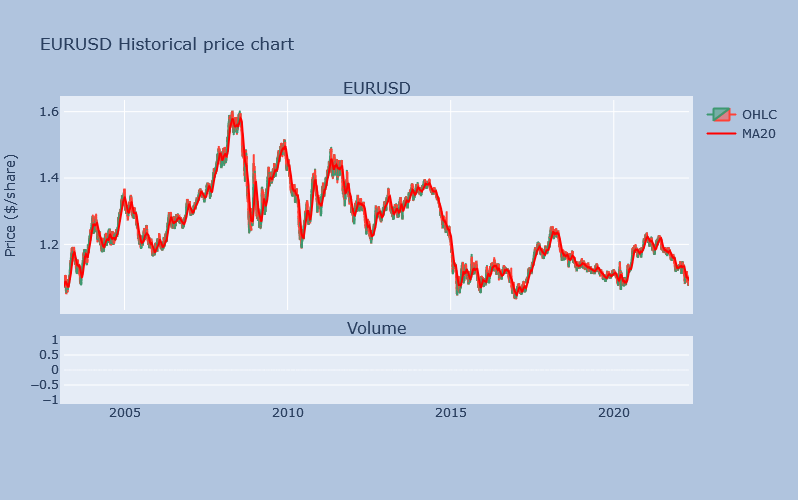

In [22]:
#20 period moving average
forex['MA20'] = forex['close'].rolling(window=20, min_periods=0).mean()
#eurusd['MA20'].head(30)

#Candlestick chart
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.10, subplot_titles=(forex_pair, 'Volume'), 
               row_width=[0.2, 0.7])

fig.add_trace(go.Candlestick(x=forex.index, open=forex["open"], high=forex["high"],
                low=forex["low"], close=forex["close"], name="OHLC"), 
                row=1, col=1)
fig.add_trace(go.Scatter(x=forex.index, y=forex["MA20"], marker_color='red',name="MA20"), row=1, col=1)


fig.add_trace(go.Bar(x=forex.index, y=forex['volume'], marker_color='lime', showlegend=False), row=2, col=1)

fig.update_layout(
    title= f'{forex_pair} Historical price chart',
    xaxis_tickfont_size=12,
    yaxis=dict(
        title='Price ($/share)',
        titlefont_size=14,
        tickfont_size=12,
    ),
    autosize=True,
    width=800,
    height=500,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    paper_bgcolor='LightSteelBlue'
    
)

fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()

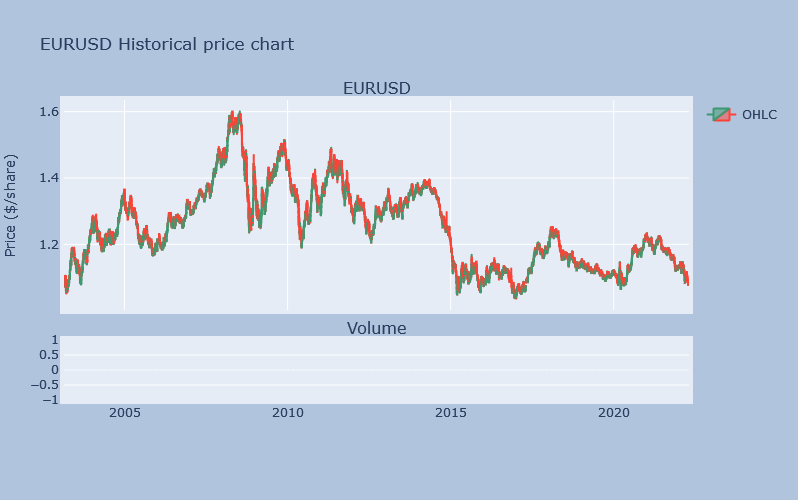

In [23]:
# Country Currency 2

#Candlestick chart
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.10, subplot_titles=(forex_pair_2, 'Volume'), 
               row_width=[0.2, 0.7])

fig.add_trace(go.Candlestick(x=forex.index, open=forex_2["open"], high=forex_2["high"],
                low=forex_2["low"], close=forex_2["close"], name="OHLC"), 
                row=1, col=1)

fig.add_trace(go.Bar(x=forex.index, y=forex_2['volume'], marker_color='lime', showlegend=False), row=2, col=1)

fig.update_layout(
    title= f'{forex_pair_2} Historical price chart',
    xaxis_tickfont_size=12,
    yaxis=dict(
        title='Price ($/share)',
        titlefont_size=14,
        tickfont_size=12,
    ),
    autosize=True,
    width=800,
    height=500,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    paper_bgcolor='LightSteelBlue'
    
)

fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()

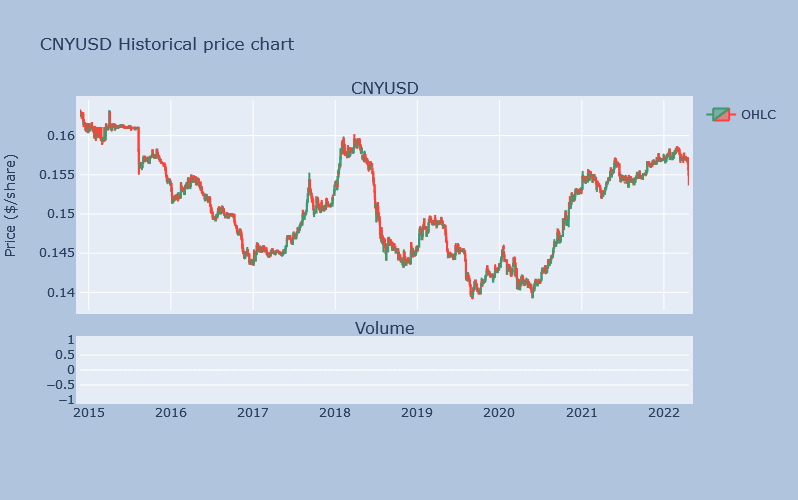

In [24]:
# Country Currency 3


#Candlestick chart
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.10, subplot_titles=(forex_pair_3, 'Volume'), 
               row_width=[0.2, 0.7])

fig.add_trace(go.Candlestick(x=forex_3.index, open=forex_3["open"], high=forex_3["high"],
                low=forex_3["low"], close=forex_3["close"], name="OHLC"), 
                row=1, col=1)

fig.add_trace(go.Bar(x=forex_3.index, y=forex_3['volume'], marker_color='lime', showlegend=False), row=2, col=1)

fig.update_layout(
    title= f'{forex_pair_3} Historical price chart',
    xaxis_tickfont_size=12,
    yaxis=dict(
        title='Price ($/share)',
        titlefont_size=14,
        tickfont_size=12,
    ),
    autosize=True,
    width=800,
    height=500,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    paper_bgcolor='LightSteelBlue'
    
)

fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()

# Foreign Exchange Currency Converter

In [ ]:
# Manually input currency

# currency, amount = CurrencyRates(), int(input("Enter the Amount: "))
# from_currency, to_currency = input("From Currency: ").upper(), input("To Currency: ").upper()


# print(from_currency, "To", to_currency, amount)
# result =  currency.convert(from_currency, to_currency, amount)
# print("Conversion Amount: ", result)

In [26]:
# Only input the amount of currency to be converted. 
 
    
    # switch ti and  from currency usd is from
    # do this for pair 2 and paie 3 

currency, amount = CurrencyRates(), int(input("Enter the Amount: "))
from_currency, to_currency = "USD", pair.upper()


print(from_currency, "To", to_currency, amount)
result =  currency.convert(from_currency, to_currency, amount)
print("Conversion Amount: ", result)

Enter the Amount:  100


USD To EUR 100
Conversion Amount:  92.44707405010631


In [27]:
# Country 2 currency conversion

currency, amount = CurrencyRates(), int(input("Enter the Amount: "))
from_currency, to_currency = "USD", pair_2.upper()


print(from_currency, "To", to_currency, amount)
result =  currency.convert(from_currency, to_currency, amount)
print("Conversion Amount: ", result)

Enter the Amount:  100


USD To EUR 100
Conversion Amount:  92.44707405010631


In [28]:
# country 3 currency conversion

currency, amount = CurrencyRates(), int(input("Enter the Amount: "))
from_currency, to_currency = "USD", pair_3.upper()


print(from_currency, "To", to_currency, amount)
result =  currency.convert(from_currency, to_currency, amount)
print("Conversion Amount: ", result)

Enter the Amount:  100


USD To CNY 100
Conversion Amount:  650.1987612092076


# Monte Carlo Simulation on the returns of the inputed currency

### Import pandas_montecarlo and run monte carlo simulation with 10 simulations (for demo simplifications) and bust/max drawdown set to -10.0% and goal threshhold set to +100.0% (defaults is >=0%):

In [29]:
# Country Currency 1
monte_carlo = forex['close'].montecarlo(sims=1000, bust =0.000000001)


In [ ]:
# Country Currency 2
monte_carlo_2 = forex_2['close'].montecarlo(sims=1000, bust =0.1, goal =1)

In [ ]:
# Country Currency 3
monte_carlo_3 = forex_3['close'].montecarlo(sims=1000, bust =0.1, goal =1)

In [ ]:
# Joined Country Currencies
joined_monte_carlo = joined_forex['close'].montecarlo(sims=1000, bust =0.1, goal =1)

### Plot Simulations

In [ ]:
# Country Currency 1
monte_carlo.plot(title=f"{forex_pair} Currency Returns Monte Carlo Simulations")

In [ ]:
# Country Currency 2
monte_carlo_2.plot(title=f"{forex_pair_2} Currency Returns Monte Carlo Simulations")

In [ ]:
# Country Currency 3
monte_carlo_3.plot(title=f"{forex_pair_3} Currency Returns Monte Carlo Simulations")

In [ ]:
# Joined Country Currencies
joined_monte_carlo.plot(title="Joined Currency Returns Monte Carlo Simulations")

In [ ]:
print(monte_carlo.stats)

In [ ]:
print(monte_carlo_2.stats)

In [ ]:
print(monte_carlo_3.stats)

In [ ]:
print(joined_monte_carlo.stats)

In [ ]:
# Set up API credentials
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

In [ ]:
# Read in data
airports = pd.read_csv(
    Path("airports.csv")
).dropna()
airports

In [ ]:
airports.dtypes



In [ ]:
name = airports['Name'].astype('string')
city = airports[' City'].astype('string')
country = airports[' Country'].astype('string')
latitude = airports[' Latitude'].astype('float')
longitude = airports[' Longitude'].astype('float')

#airports_df = pd.DataFrame(columns=['Name', 'City', 'Country', 'Latitude', 'Longitude'])
#airports_df

airports_df = pd.DataFrame(columns=airports[' City'].unique().astype('str')).transpose()
#airports_df = pd.DataFrame(columns=['City'])
airports_df

# airports_df = pd.DataFrame(columns=[airports['Name'].astype('string'), airports[' City'].astype('string'), airports[' Country'].astype('string'), airports[' Latitude'].astype('float'), airports[' Longitude'].astype('float')])
# airports_df = airports_df.transpose()
# airports_df

In [ ]:
# cities = airports[' City'].unique()
# cities

#.drop(columns=[' IATA', ' ICAO', ' Altitude', ' Timezone', ' DST', ' Type', ' Source'], inplace=True) 

cities = airports.astype('string').reset_index().groupby(' Name', ' City', ' Country', ' Latitude', ' Longitude')
cities

In [ ]:
# # Slice and plot data by name
# map_1 = px.scatter_mapbox(
#     airports,
#     lat=' Latitude',
#     lon=' Longitude',
#     color="Name"
# )
# map_1.show()

In [ ]:
forex_close

In [ ]:
# Configuring a Monte Carlo simulation to forecast x years cumulative returns
def MC_Simulation():
    monte_carlo_simulation = MCSimulation(
        portfolio_data = joined_forex[f'{forex_pair}'],
#        weights = weights,
        num_simulation = 10,
        num_trading_days= 252 # * number_of_years
    )
    
# Print the simulation input data
    monte_carlo_simulation.portfolio_data.head()
# Running a Monte Carlo Simulation to forecast a x years cumulative returns
    monte_carlo_simulation.calc_cumulative_return()
    monte_carlo_simulation_line_plot = monte_carlo_simulation.plot_simulation()
# Fetch summary statistics from the Monte Carlo simulation results
    monte_carlo_simulation_tbl = monte_carlo_simulation.summarize_cumulative_return()
# Print Summary statistics
    print()
    print(monte_carlo_simulation_tbl)
    
    ci_lower = round(monte_carlo_simulation_tbl[8]* initial_investment,2)
    ci_upper = round(monte_carlo_simulation_tbl[9]* initial_investment,2)
# Print results
    print()
    print(f"initial investment of ${initial_investment} in the portfolio"
          f" There is a 95% chance that over the next inputed amount of years, Portfolio will end within in the range of"
          f" ${ci_lower} and ${ci_upper}")
    print()
    return

In [ ]:
MC_Simulation()

In [ ]:
joined_forex